In [1]:
import os
import pandas as pd
import math
import cmath
from matplotlib import pyplot as plt
%matplotlib inline
import dyd_parser
reload(dyd_parser)
import chf_parser
reload(chf_parser)
from dyd_parser import read_gen_df, concat_gen_dfs
from chf_parser import *

# Reading and creating the data frames

In [37]:
user_dir = os.getenv('USERPROFILE')
proj_dir = os.path.join(user_dir, 'Desktop', 'AXA', 'PSCC18_paper')
# proj_dir = os.path.join(userhome, r'OneDrive - Narodowe Centrum Badan Jadrowych\PSLFProjects\PSCC18_paper')

time_fault = dict()
time_fault['on'] = 0.0
time_fault['clear'] = 0.2
time_fault['off'] = time_fault['on'] + time_fault['clear']

case_name = 'new39_scopf'
gen_trip = True
abus_ref = 0
agc_on = 0

gen_model = 'genrou'
# gen_model = 'gencls'

chf_dir = os.path.join('results', '%s_%s_trip%1d_refa%d_agc%d_bus' % (case_name, gen_model, int(gen_trip), abus_ref, agc_on), 'results')
chf_file = os.path.join(proj_dir, chf_dir, 'fP0_L16_T000' + '.csv')
chf_df = read_chf_csv(chf_file, gen_model=gen_model, gen_oosmho=True, fault_time=time_fault['on'])
# gen_df = read_gen_df(gen_model=gen_model)
gen_df = concat_gen_dfs([gen_model, 'gensal'])


## Gen. dyd-file data frame

In [38]:
# test_df = gen_df.merge(genrou_df, left_on='gen_id', right_index=True, how='outer')
# print chf_df.columns
gen_df

name     kv   id   rl        mva   tpdo  tppdo  tpqo  tppqo      h  \
30  30.0  345.0  1.0  9.0  1000000.0   7.00   0.03  0.70   0.04  7.500   
31  31.0   22.0  1.0  9.0      646.0   6.56   0.03  1.50   0.04  5.280   
32  32.0   22.0  1.0  9.0      753.0   5.70   0.03  1.50   0.04  4.750   
33  33.0   22.0  1.0  9.0      917.0   5.69   0.03  1.50   0.04  3.117   
34  34.0   22.0  1.0  9.0      508.0   5.40   0.03  0.44   0.04  8.580   
35  35.0   22.0  1.0  9.0      800.0   7.30   0.03  0.40   0.04  4.350   
36  36.0   22.0  1.0  9.0      816.0   5.66   0.03  1.50   0.04  3.230   
37  37.0   22.0  1.0  9.0      702.0   6.70   0.03  0.41   0.04  3.460   
38  38.0   22.0  1.0  9.0      865.0   4.79   0.03  1.96   0.04  4.920   
39  39.0   22.0  1.0  9.0     1290.0  10.20   0.03   NaN   0.04  3.255   

        ...        xx_q  xxx_d     ll    s1  s12   ra  rcomp  xcomp  accel  \
30      ...       0.533  0.200  0.003  0.05  0.3  0.0    0.0    0.0    0.5   
31      ...       0.976  0.200  0.035  0.05  0.3  0.0    0.0    0.0    0.5   
32      ...       0.660  0.200  0.030  0.05  0.3  0.0    0.0    0.0    0.5   
33      ...       1.523  0.200  0.030  0.05  0.3  0.0    0.0    0.0    0.5   
34      ...       0.503  0.200  0.054  0.05  0.3  0.0    0.0    0.0    0.5   
35      ...       0.651  0.200  0.022  0.05  0.3  0.0    0.0    0.0    0.5   
36      ...       1.518  0.200  0.032  0.05  0.3  0.0    0.0    0.0    0.5   
37      ...       0.639  0.200  0.028  0.05  0.3  0.0    0.0    0.0    0.5   
38      ...       0.411  0.200  0.030  0.05  0.3  0.0    0.0    0.0    0.5   
39      ...         NaN  0.082  0.013  0.05  0.3  0.0    0.0    0.0    NaN   

               m  
30  47746.482928  
31     21.714336  
32     22.770298  
33     18.196433  
34     27.747964  
35     22.154368  
36     16.779260  
37     15.462985  
38     27.093264  
39     26.731346  

[10 rows x 24 columns]

# Plotting gen. variables

In [39]:
import chf_plotter
reload(chf_plotter)
from chf_plotter import *

time_range = (-0.1, 1)

## Angles (mechanic and electric) and speed

In [40]:
# spd_df = plot_gen_var_df(plt, time_range, chf_df, 'spd', var_ref=1)

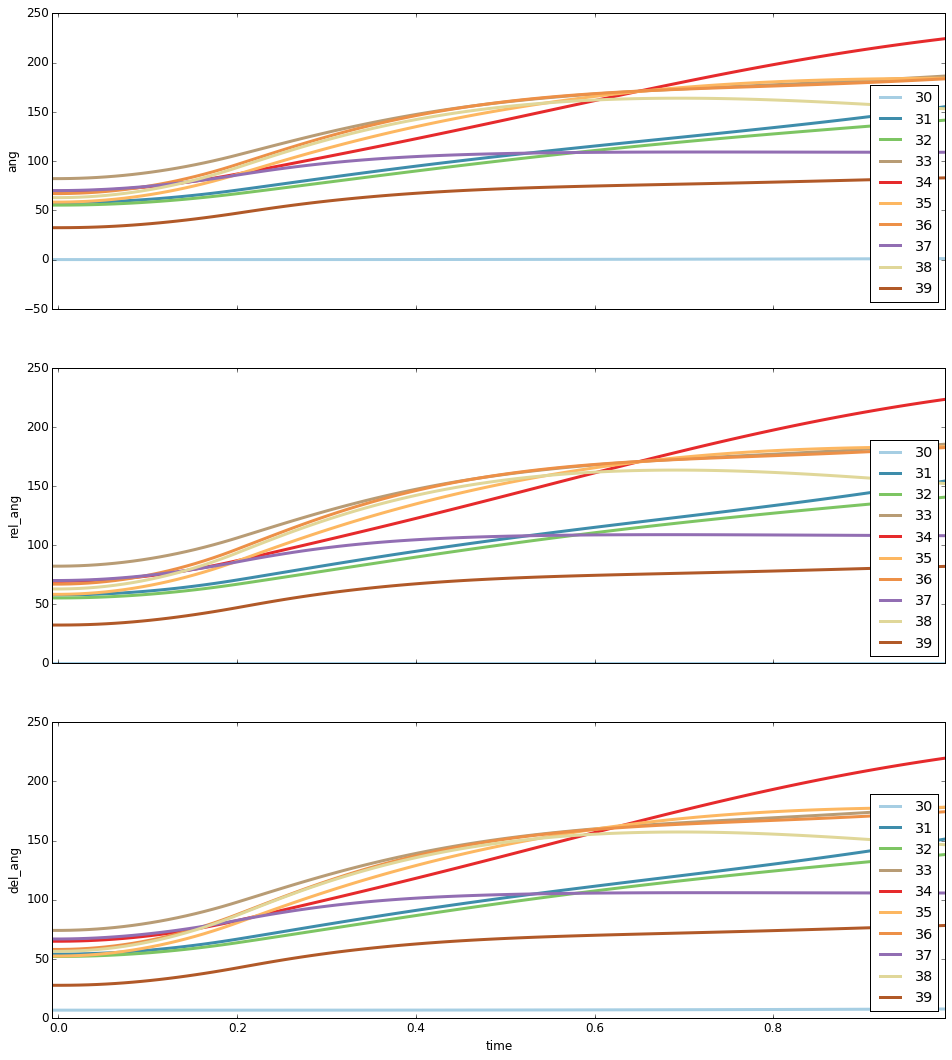

In [41]:
ang_dfs = plot_gen_var_dfs(plt, time_range, chf_df, ('ang', 'rel_ang', 'del_ang'), ylims=None, save=True, figsize=(16,6))

## Gen. powers & other tests

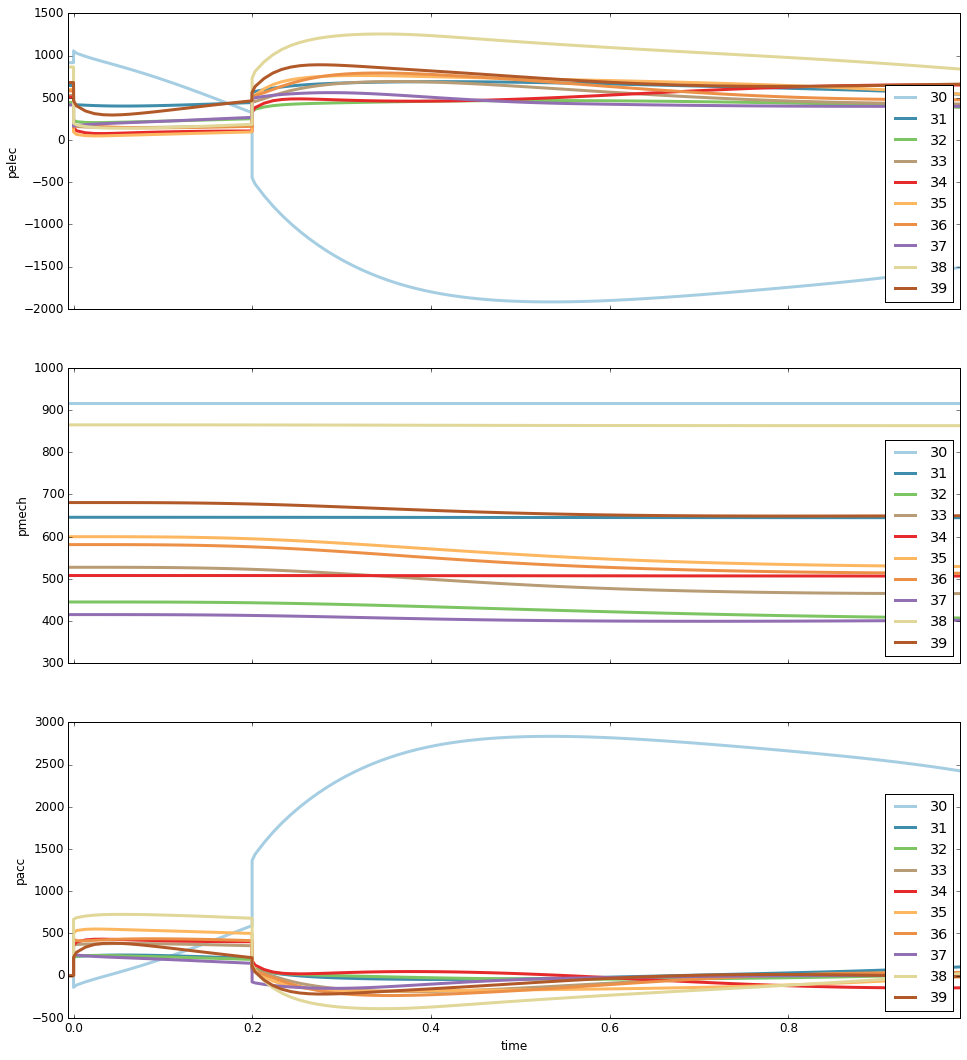

In [42]:
# oostr_df = get_var_df(time_range, chf_df, 'oostr')
# oostr_df[oostr_df >= 2]
# plt.plot(ang_dfs['ang']['30'])
pow_dfs = plot_gen_var_dfs(plt, time_range, chf_df, ('pelec', 'pmech', 'pacc'), ylims=None, save=True, figsize=(16,6))

## Gen. bus voltage - mag. and arg.

In [43]:
# volt_dfs = plot_gen_var_dfs(plt, time_range, chf_df, ('vbus', 'vt'), save=False)

In [44]:
# volt_dfs['vbus']['36'].plot()

### Voltage angle tests

In [45]:
# vbus_df = volt_dfs['vbus']
# vbus_df['step'] = list(get_step_deltas(vbus_df, 'time', 'bef') * get_step_deltas(vbus_df, 'time', 'aft'))
# # vbus_df[vbus_df.step == 0.0]

In [46]:
# vbus_df['on'] = abs(vbus_df.index - time_fault['on'])
# vbus_df['off'] = abs(vbus_df.index - time_fault['off'])
# vbus_df['test'] = vbus_df.on * vbus_df.off
# # vbus_df[vbus_df.step == 0.0]

In [47]:
# vbus_df.sort_values(['test']).iloc[:4].sort_index()

## P-delta planes

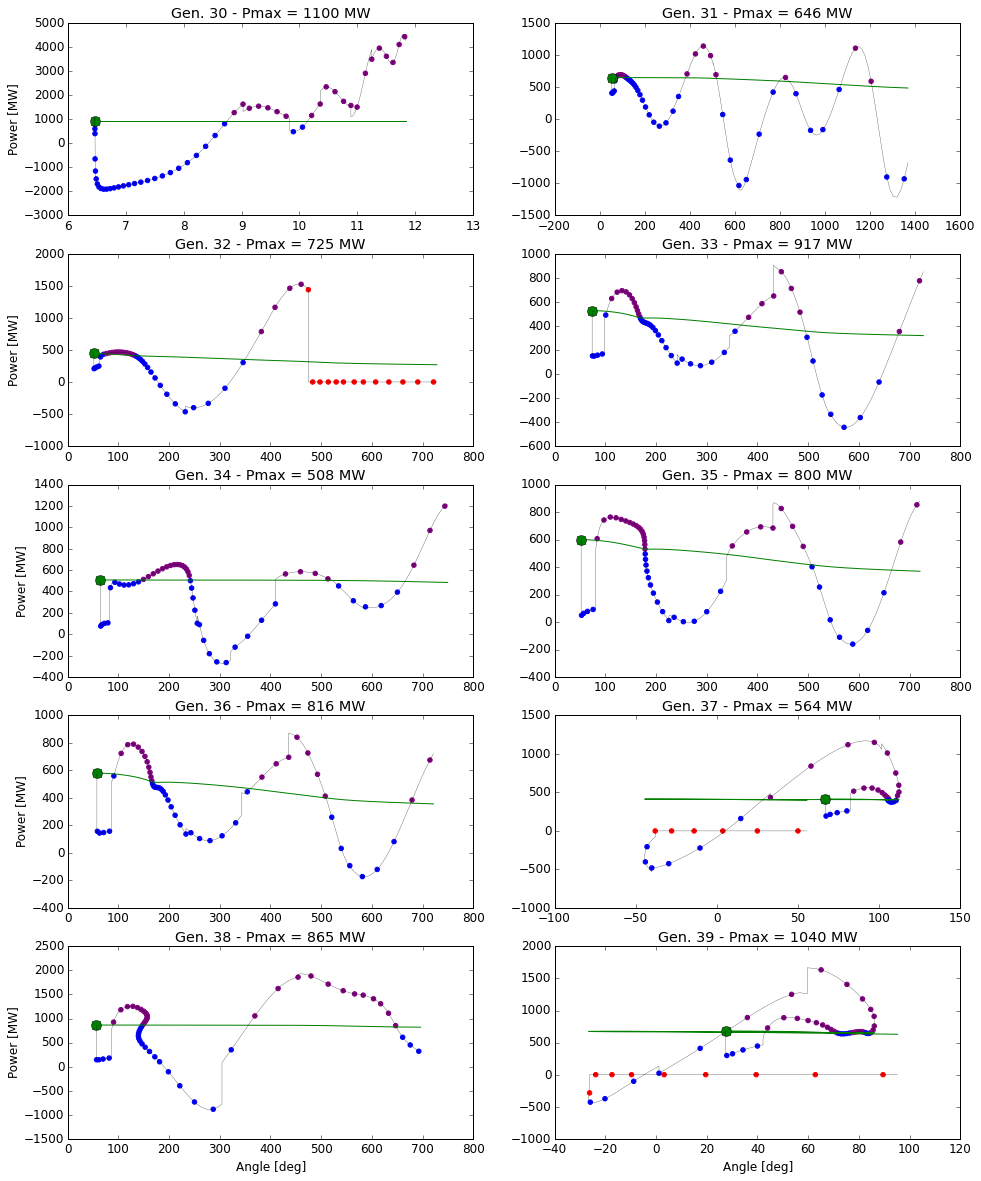

In [48]:
reload(chf_plotter)
from chf_plotter import *
time_range = (0.0, 2.5)
plot_gen_P_delta(plt, time_range, chf_df, ang_name='del_ang', gen_step=5, drop_times=None, save=True)

# OMIB analysis

In [73]:
# import omib_maker
# reload(omib_maker)
# from omib_maker import *
import sime_runner
reload(sime_runner)
from sime_runner import *

fault_times = (time_fault['on'], time_fault['off'])
time_range = (time_fault['on'], 0.86)

## SIME - TSA

### First run only

In [74]:
omib_dfs = get_omib_dfs(time_range, chf_df, gen_oosmho=True)
omib = get_omib_vars_df(omib_dfs, gen_dict=None, gen_df=gen_df, chf_df=chf_df, drop_times=fault_times)
tsa = get_omib_tsa(omib, fault_times)
# # omib = get_omib_vars_df(omib_dfs, gen_dict=tsa['gen_dict'], gen_df=gen_df, drop_times=time_fault.values())
# tsa = get_omib_tsa(omib, fault_times=fault_times)
tsa_df = tsa['df']

print 'SIME result =', tsa['result'], ': margin = ', tsa['margin']
print 'SIME time =', tsa['time']
print 'OOSMHO time =', tsa['oostr']
print tsa['gen_dict']['mach']

SIME result = instable : margin =  -32.9930236825
SIME time = 0.852479
OOSMHO time = None
{'NM': [39], 'CM': [31, 32, 33, 34, 35, 36, 37, 38]}


### Both runs

In [75]:
tsa = get_sime_tsa(time_range, fault_times, chf_df, gen_df, gen_oosmho=True, drop_delta=0.00333)
tsa_df = tsa['df']

print 'SIME result =', tsa['result'], ': margin = ', tsa['margin']
print 'SIME time =', tsa['time']
print 'OOSMHO time =', tsa['oostr']
print tsa['gen_dict']['mach']

SIME result = instable : margin =  0.984610971431
SIME time = 0.852479
OOSMHO time = None
{'NM': [39], 'CM': [31, 32, 33, 34, 35, 36, 37, 38]}


## Plots & results

In [76]:
import omib_plotter
reload(omib_plotter)
from omib_plotter import *

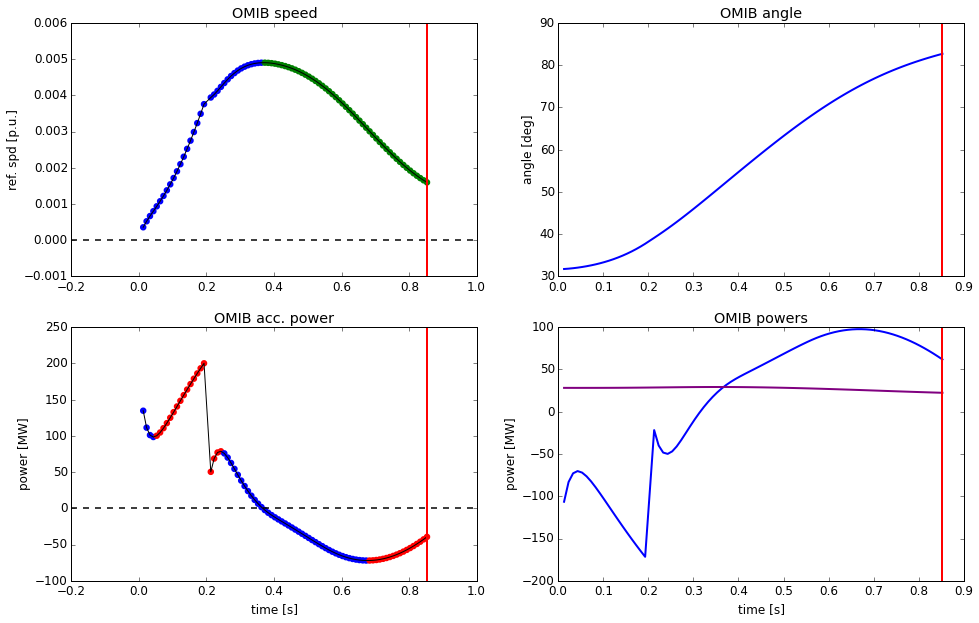

In [77]:
plot_omib_vars(plt, tsa, gen_step=1, save=True)

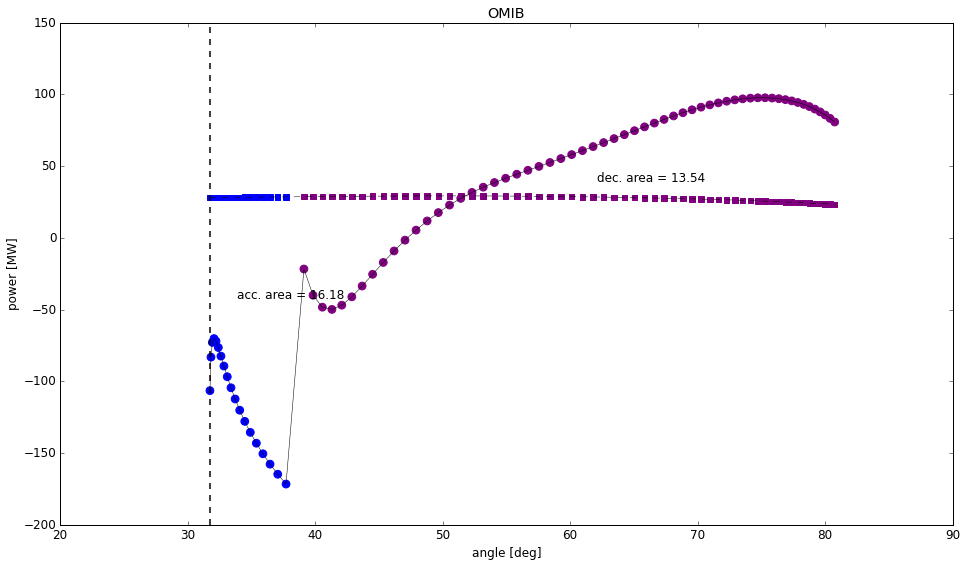

In [68]:
plot_omib_P_delta(plt, tsa, gen_step=1, markersize=60, save=True)

## Acc. power fitting test

In [20]:
test_df = tsa_df[:tsa['time']].loc[tsa_df.time_period == 'post'][['ang', 'pacc']]
import numpy as np
fit_coeffs = np.polyfit(test_df.ang, test_df.pacc, 2)
fit_func = lambda x, c:  sum([ a*x**(len(c)-1-i) for (i, a) in enumerate(c) ])
fit_test = [ fit_func(x, fit_coeffs) for x in test_df.ang.values ]
test_df['fit'] = fit_test
test_df

ang        pacc         fit
0.206460  22.292164  121.227545  130.518471
0.216450  21.594564  113.231557  144.559179
0.226440  20.924789  118.810858  158.105187
0.236430  20.284081  130.300591  171.123243
0.246420  19.675321  144.429055  183.546415
0.256410  19.101987  159.538393  195.295008
0.266400  18.567836  174.801312  206.282867
0.276390  18.076628  189.792866  216.423303
0.286380  17.632042  204.131189  225.630963
0.296370  17.237660  217.532050  233.822472
0.306360  16.896783  229.740097  240.920523
0.316350  16.612469  240.552965  246.853471
0.326340  16.387386  249.814509  251.558580
0.336330  16.223857  257.400045  254.981503
0.346320  16.123808  263.215150  257.077568
0.356310  16.088684  267.193396  257.813776
0.366300  16.119538  269.290392  257.167048
0.376290  16.216937  269.481655  255.126422
0.386280  16.380975  267.765585  251.692689
0.396270  16.611248  264.162397  246.878977
0.406260  16.906920  258.709962  240.709214
0.416250  17.266672  251.469445  233.219110
0.426240  17.688764  242.586062  224.454651
0.436230  18.171027  232.228074  214.471870
0.446220  18.710910  220.540907  203.335743
0.456210  19.305538  207.657291  191.118529
0.466200  19.951770  193.691377  177.898271
0.476190  20.646167  178.748394  163.759101
0.486180  21.385026  162.932786  148.790147
0.496170  22.164458  146.344528  133.083633
0.506160  22.980354  129.083254  116.735180
0.516150  23.828424  111.252719   99.842750
0.526140  24.704260   92.952377   82.504954
0.536130  25.603312   74.288242   64.821429
0.546120  26.520939   55.363072   46.891487
0.556110  27.452441   36.281719   28.813328
0.566100  28.393081   17.147542   10.683450
0.576090  29.338072   -1.935789   -7.403148
0.586080  30.282674  -20.868726  -25.354958
0.596070  31.222179  -39.553189  -43.083617
0.606059  32.151925  -57.894662  -60.504131
0.616049  33.067341  -75.802900  -77.535625
0.626039  33.963976  -93.193049  -94.101784
0.636029  34.837485 -109.984292 -110.130358
0.646019  35.683695 -126.103018 -125.554192
0.656009  36.498588 -141.480668 -140.310612
0.665999  37.278333 -156.054784 -154.341868
0.675989  38.019302 -169.769610 -167.594959
0.685979  38.718081 -182.576238 -180.021664
0.695969  39.371489 -194.413393 -191.578479
0.705959  39.976578 -205.194769 -202.226343
0.715949  40.530682 -214.854826 -211.931204
0.725939  41.031410 -223.347701 -220.663501
0.735929  41.476655 -230.644000 -228.398199
0.745919  41.864608 -236.727346 -235.114552
0.755909  42.193772 -241.592001 -240.796289
0.765899  42.462950 -245.239008 -245.431127
0.775889  42.671257 -247.675616 -249.010752
0.785879  42.818104 -248.913263 -251.530507
0.795869  42.903204 -248.967202 -252.989334

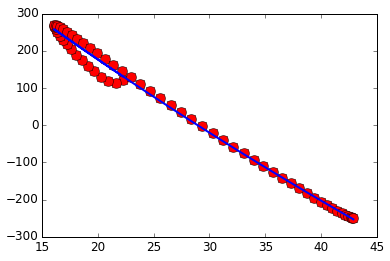

In [21]:
plt.plot(test_df.ang, test_df.pacc, 'ro', test_df.ang, test_df.fit, linewidth=2, markersize=10)
plt.show()

# Other tests

In [28]:
gen_dict = tsa['gen_dict']
print gen_dict

var_rows = dict()
idx = 20
for var in ['pelec', 'pmech', 'pacc']:
    var_rows[var] = pow_dfs[var][map(str, range(31, 40))].iloc[idx] #loc[0.0].iloc[0]
    var_rows[var].index = map(int, var_rows[var].index)
    
    print var, pow_dfs[var].index[idx], ', '.join(map(lambda p: str(round(p)), var_rows[var].values)),\
    round(get_omib_avg_out(var_row=var_rows[var], iner_row=gen_dict['iner'], mach_dict=gen_dict['mach']))
    
# var_rows

{'iner': 31       21.714336
32       22.770298
33       18.196433
34       27.747964
35       22.154368
36       16.779260
37       15.462985
38       27.093264
39       26.731346
CM      171.918909
NM       26.731346
OMIB     23.134246
dtype: float64, 'mach': {'NM': [39], 'CM': [31, 32, 33, 34, 35, 36, 37, 38]}}
pelec 0.1665 579.0, 389.0, 474.0, 418.0, 503.0, 511.0, 343.0, 722.0, 420.0 167.0
pmech 0.1665 646.0, 445.0, 527.0, 508.0, 599.0, 581.0, 415.0, 865.0, 679.0 29.0
pacc 0.1665 67.0, 56.0, 53.0, 90.0, 97.0, 69.0, 72.0, 143.0, 259.0 -138.0


In [24]:
tsa['gen_dict']

{'iner': 31       21.714336
 32       22.770298
 33       18.196433
 34       27.747964
 35       22.154368
 36       16.779260
 37       15.462985
 38       27.093264
 39       26.731346
 CM      171.918909
 NM       26.731346
 OMIB     23.134246
 dtype: float64, 'mach': {'CM': [31, 32, 33, 34, 35, 36, 37, 38], 'NM': [39]}}